# Import packages

In [2]:
import scipy.io as sio
import seaborn as sns
import matplotlib.transforms as transforms
from datetime import datetime
from skimage.io import imsave
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
#import deepdish as dd
from scipy.io import loadmat
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import re
from statsmodels.stats.anova import anova_lm
import os
import os.path
import statsmodels.api as smapi
import sys
import warnings
from sklearn.linear_model import LinearRegression
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
import statsmodels as sm
import scipy
from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
import networkx as nx
from pyinform import transfer_entropy

# Components

In [45]:
Compdf=pd.read_pickle("Compdf.pkl")

In [26]:
GoodICFiles.to_pickle("GoodICsdf.pkl")

In [3]:
NameList=list(Compdf.CompID.unique())

In [46]:
GoodICFiles=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\GoodICsdf.pkl")

In [ ]:
CovMat=np.zeros((len(NameList),len(NameList)))
InvCovMat=np.zeros((len(NameList),len(NameList)))
OccMat=np.zeros((len(NameList),len(NameList)))

for i in range(GoodICFiles.shape[0]): 
#for i in range(30):     
    try:
        TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']
        Cov=np.dot(TS,TS.T)
        InvCov=np.linalg.pinv(np.dot(TS,TS.T))
        for j in range(len(TS)):
            CompName=Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == j)]['CompID'].iloc[0]
            if len(CompName)>0:
                print(CompName)
                for k in range(j,len(NameList)):
                    CompName2=Compdf.loc[(Compdf.TSfile == GoodICFiles.iloc[i]['TSfile']) & (Compdf.CompNum == k)]['CompID'].iloc[0]
                    if len(CompName2)>0 and CompName2!=CompName:
                        CovMat[NameList.index(CompName),NameList.index(CompName2)]+=Cov[j,k]
                        InvCovMat[NameList.index(CompName),NameList.index(CompName2)]+=InvCov[j,k]
                        OccMat[NameList.index(CompName),NameList.index(CompName2)]+=1        
            
        
        del TS
    except:
            continue   
                    # Regress here, cross corr...

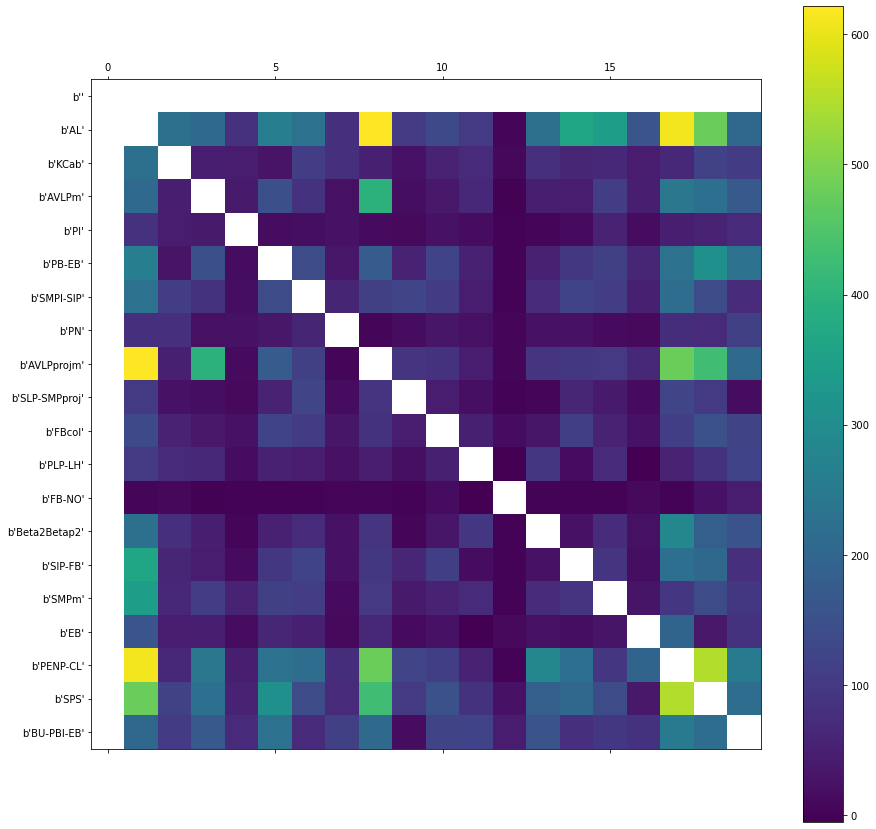

In [35]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
CovMatNorm=(CovMat+CovMat.T)/(OccMat+OccMat.T)
cax = ax.matshow(CovMatNorm[0:20,0:20])
fig.colorbar(cax)
yaxis = np.arange(len(NameList[0:20]))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList[0:20])

plt.show()

NameError: name 'InvCovMat' is not defined

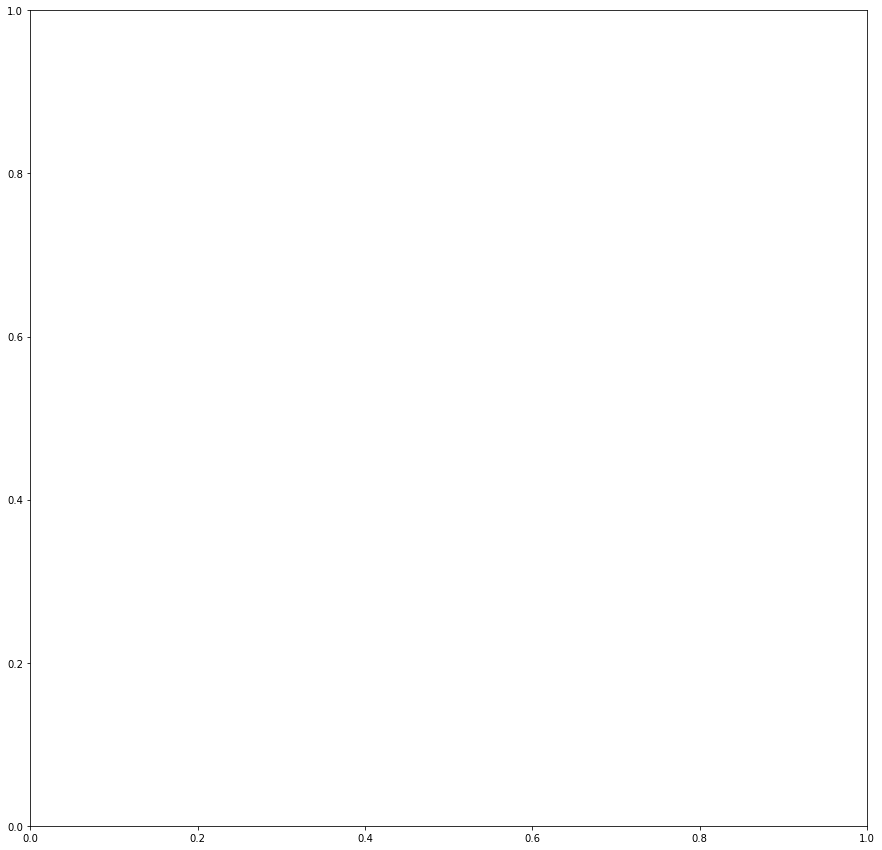

In [3]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow((InvCovMat[0:70,0:70]+InvCovMat[0:70,0:70].T)/(OccMat[0:70,0:70]+OccMat[0:70,0:70].T))
fig.colorbar(cax)
yaxis = np.arange(len(NameList)+1)
ax.set_yticks(yaxis)
ax.set_yticklabels(['']+NameList)

plt.show()

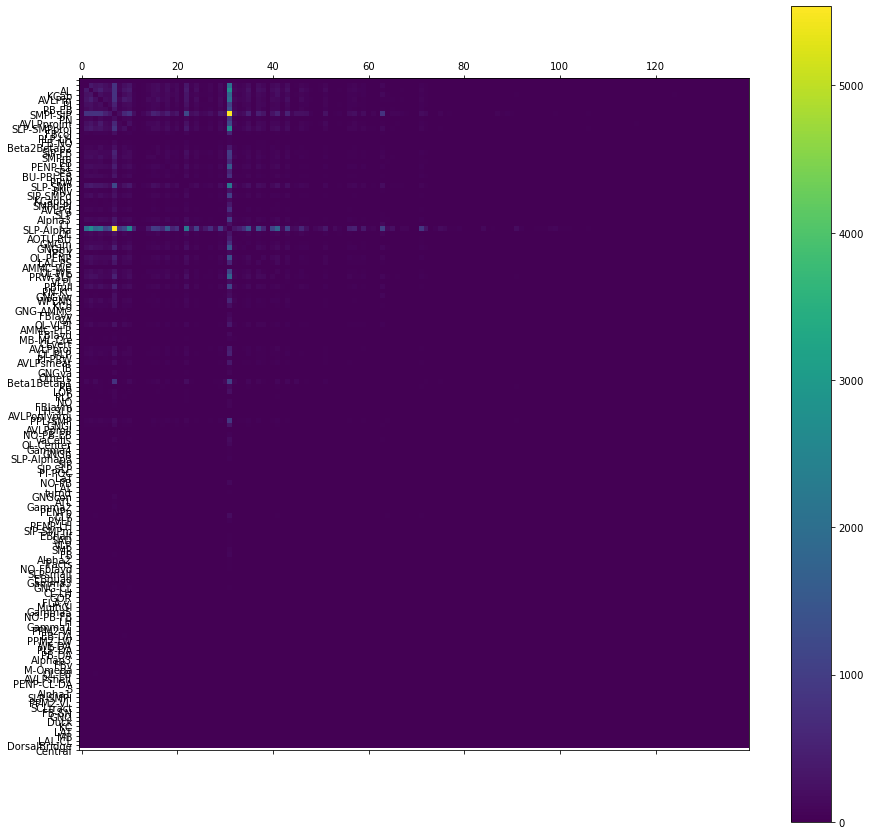

In [16]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(OccMat+OccMat.T)
fig.colorbar(cax)
yaxis = np.arange(len(NameList)+1)
ax.set_yticks(yaxis)
ax.set_yticklabels(['']+NameList)

plt.show()

In [17]:
import h5py

In [18]:
hf = h5py.File('ComponentConnectome.h5', 'w')
hf.create_dataset('NameList', data=NameList)
hf.create_dataset('OccurenceMatrix', data=OccMat)
hf.create_dataset('InvCovMat', data=InvCovMat)
hf.create_dataset('CovMat', data=CovMat)
hf.close()

# TS from masks

In [60]:
NameList=['AL','MB','SNP','LH','INP','CX','LX','PENP','GNG','VMNP','VLNP','OL']

In [61]:
GoodICFiles['GAL4'].unique()

array(['Nsyb', 'GMR57C10', nan, 'Cha', 'Vglut', 'Gad', 'TH', 'Trh', 'TDC'],
      dtype=object)

In [62]:
list(GoodICFiles.loc[GoodICFiles.index == i]['GAL4'])[0]

'TDC'

In [72]:
CovMat12R=np.zeros((len(NameList),len(NameList)))
InvCovMat12R=np.zeros((len(NameList),len(NameList)))
Cov=np.zeros((len(NameList),len(NameList)))
InvCov=np.zeros((len(NameList),len(NameList)))

CovMatDiff12R=np.zeros((len(NameList),len(NameList)))
InvCovMatDiff12R=np.zeros((len(NameList),len(NameList)))
CovDiff=np.zeros((len(NameList),len(NameList)))
InvCovDiff=np.zeros((len(NameList),len(NameList)))


for i in range(GoodICFiles.shape[0]): 
#for i in range(10):     
    try:
        if list(GoodICFiles.loc[GoodICFiles.index == i]['GAL4'])[0]=='Nsyb' or list(GoodICFiles.loc[GoodICFiles.index == i]['GAL4'])[0]=='GMR57C10':
            TS=loadmat(list(GoodICFiles.loc[GoodICFiles.index == i]['12RegionFile'])[0])['TS']
            if TS.shape[1]>TS.shape[0]:
                TS=TS.T


            Cov=np.dot(TS.T,TS)
            Cov[np.eye(12)==1]=0
            Cov=np.abs(Cov+Cov.T)
            Cov=Cov/np.nanmedian(np.nanmedian(Cov))
            
            InvCov=np.linalg.pinv(np.dot(TS.T,TS))
            #Covw=np.abs(Covw+Covw.T)
            #Covw=Covw/np.nanmedian(np.nanmedian(Covw))
            
            CovMat12R=CovMat12R+Cov
            InvCovMat12R+=InvCov

            TSdiff=np.diff(TS.T).T
            CovDiff=np.dot(TSdiff.T,TSdiff)
            CovDiff[np.eye(12)==1]=0  
            InvCovDiff=np.linalg.pinv(np.dot(TSdiff.T,TSdiff))        
            CovMatDiff12R+=CovDiff
            InvCovMatDiff12R+=InvCovDiff

            print(i)
            del TS
    except:
        continue   
                    # Regress here, cross corr...

0
1
2
3
4
8
9
10
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
36
37
46
47
48
51
52
53
55
56
57
60
68
69
71
72
73
75
76
84
85
88
89
90


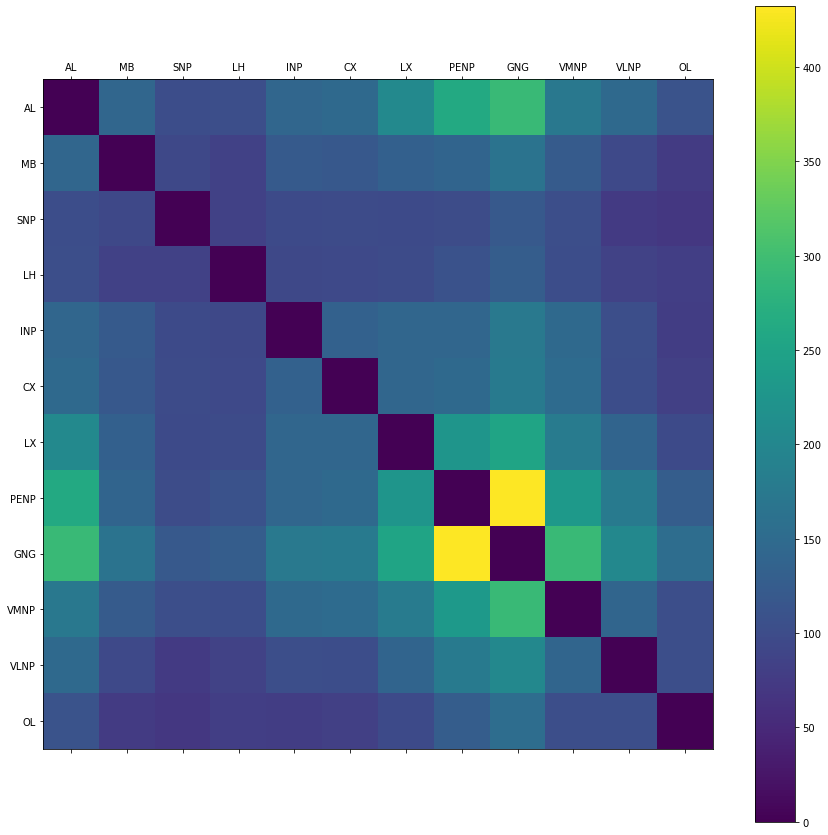

In [73]:

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow((CovMat12R+CovMat12R.T))
fig.colorbar(cax)
yaxis = np.arange(len(NameList))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList)

xaxis = np.arange(len(NameList))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList)

plt.show()

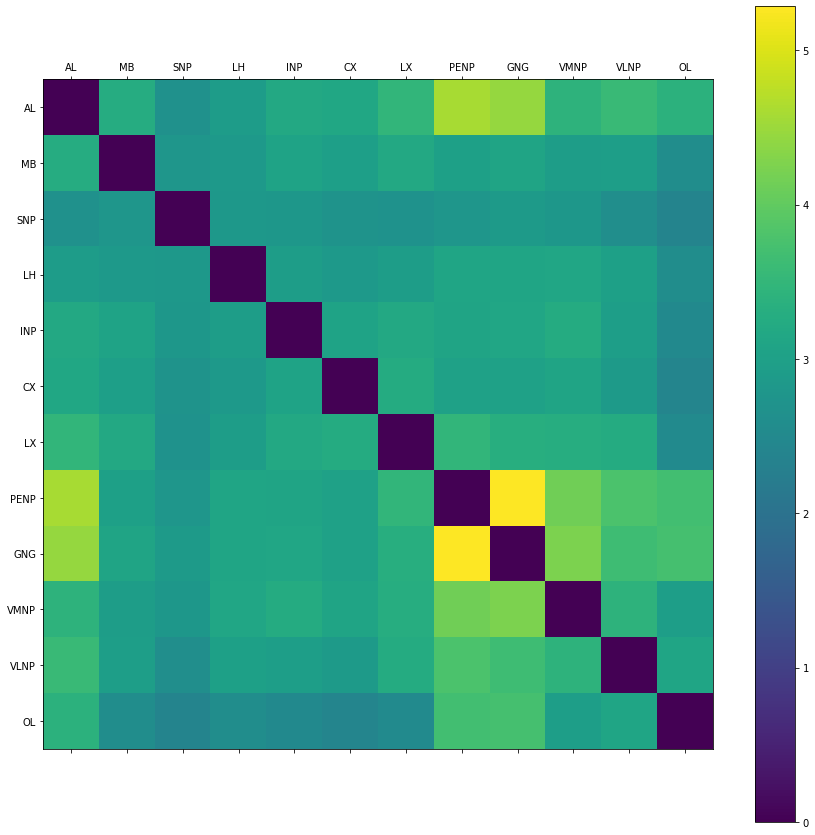

In [74]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(CovMatDiff12R+CovMatDiff12R.T)
fig.colorbar(cax)
yaxis = np.arange(len(NameList))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList)

xaxis = np.arange(len(NameList))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList)

plt.show()

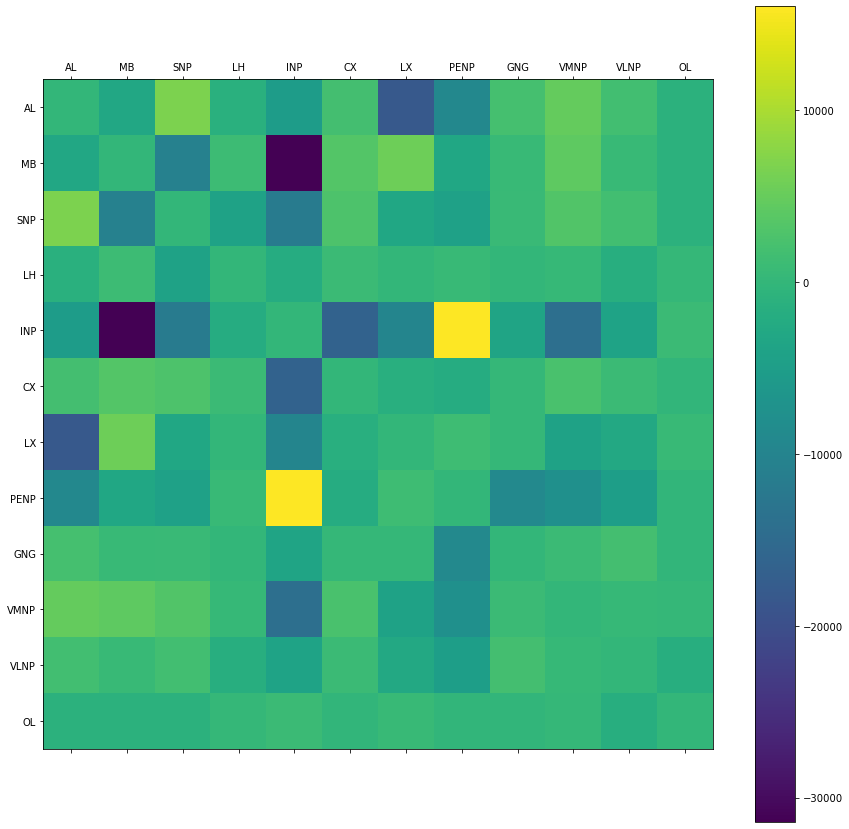

In [75]:

InvCovMat12R[np.eye(12)==1]=0
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow((InvCovMat12R+InvCovMat12R.T))
fig.colorbar(cax)
yaxis = np.arange(len(NameList))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList)

xaxis = np.arange(len(NameList))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList)

plt.show()

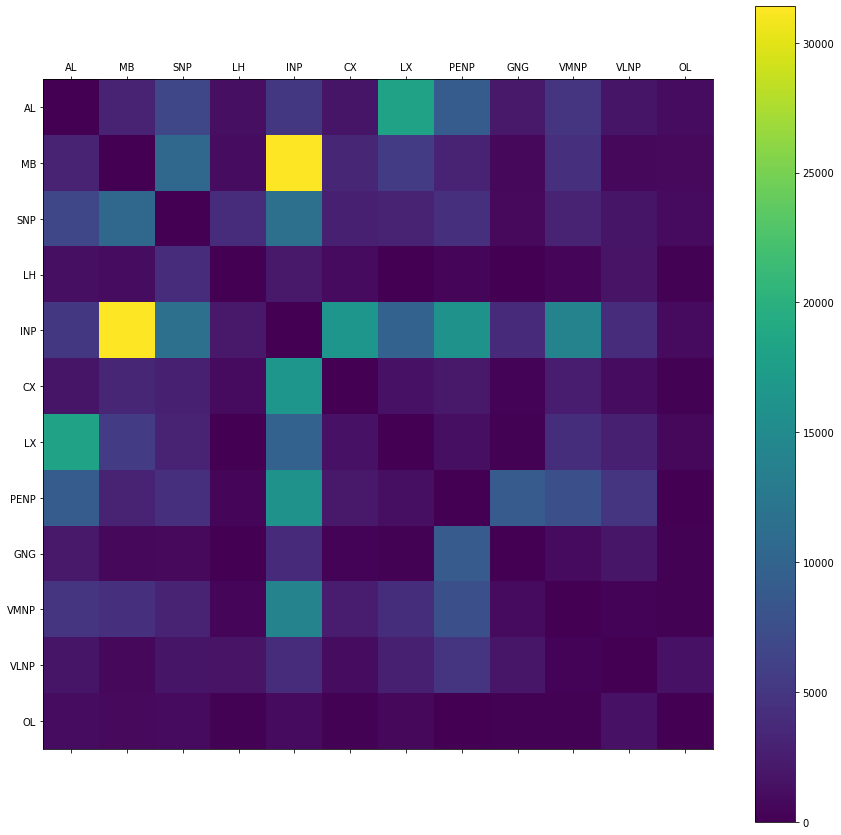

In [76]:
InvCovMat12R[np.eye(12)==1]=0
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(np.abs(InvCovMat12R+InvCovMat12R.T))
fig.colorbar(cax)
yaxis = np.arange(len(NameList))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList)

xaxis = np.arange(len(NameList))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList)

plt.show()

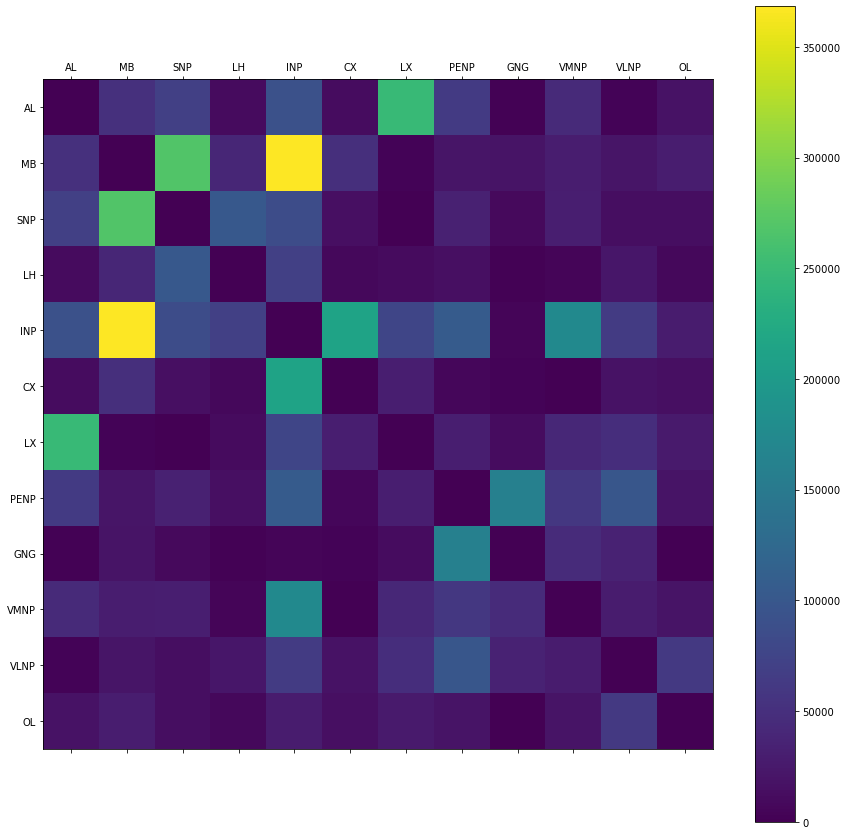

In [77]:
InvCovMatDiff12R[np.eye(12)==1]=0
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(np.abs(InvCovMatDiff12R+InvCovMatDiff12R.T))
fig.colorbar(cax)
yaxis = np.arange(len(NameList))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList)

xaxis = np.arange(len(NameList))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList)

plt.show()

In [114]:
hf = h5py.File('12RegionsConnectome.h5', 'w')
hf.create_dataset('NameList', data=NameList)
hf.create_dataset('InvCovMat12R', data=InvCovMat12R)
hf.create_dataset('CovMat12R', data=CovMat12R)
hf.close()

# Separating walk from non walk

(12, 379)
(12, 2390)
3    100761
Name: expID, dtype: object
(12, 923)
(12, 40)
4    100762
Name: expID, dtype: object
(12, 1654)
(12, 1027)
8    103
Name: expID, dtype: object
(12, 437)
(12, 3415)
9    104
Name: expID, dtype: object
(12, 634)
(12, 86)
13    B34
Name: expID, dtype: object
(12, 4595)
(12, 0)
(12, 4622)
(12, 0)
(12, 4105)
(12, 0)
(12, 616)
(12, 3240)
17    B38
Name: expID, dtype: object
(12, 377)
(12, 3524)
18    B39
Name: expID, dtype: object
(12, 764)
(12, 3315)
19    B40
Name: expID, dtype: object
(12, 1714)
(12, 896)
20    B41
Name: expID, dtype: object
(12, 470)
(12, 3187)
21    B42
Name: expID, dtype: object
(12, 5562)
(12, 0)
(12, 1247)
(12, 2298)
25    B182
Name: expID, dtype: object
(12, 703)
(12, 3800)
26    B183
Name: expID, dtype: object
(12, 2166)
(12, 74)
30    B193
Name: expID, dtype: object
(12, 650)
(12, 0)
(12, 252)
(12, 2195)
32    B195
Name: expID, dtype: object
(12, 61)
(12, 2556)
33    B196
Name: expID, dtype: object
(12, 588)
(12, 1169)
53    B993
N

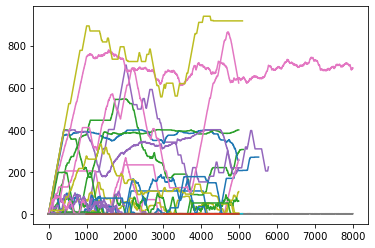

In [120]:
CovMat12Rw=np.zeros((12,12))
InvCovMat12Rw=np.zeros((12,12))
Covw=np.zeros((12,12))
InvCovw=np.zeros((12,12))


CovMat12Rnw=np.zeros((12,12))
InvCovMat12Rnw=np.zeros((12,12))
Covnw=np.zeros((12,12))
InvCovnw=np.zeros((12,12))

for i in range(3,GoodICFiles.shape[0]): 
#for i in range(10):       
    try:
        if list(GoodICFiles.loc[GoodICFiles.index == i]['GAL4'])[0]=='Nsyb' or list(GoodICFiles.loc[GoodICFiles.index == i]['GAL4'])[0]=='GMR57C10':
            TS=loadmat(list(GoodICFiles.loc[GoodICFiles.index == i]['12RegionFile'])[0])['TS']
                
            try:
                Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['R']
            except:
                try:
                    Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rwalk']
                except:
                    try:
                        Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('WalkRbinkd','Rbin'))['R']
                    except:
                        try:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('Rbinkd','Rbin'))['Rbin']
                        except:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rbin']
 
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]+4):
                TS=TS[:,2:Regressor.shape[0]-2]   
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    

            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]    
            if TS.shape[1]==(Regressor.shape[0]-5):
                Regressor=Regressor[2:Regressor.shape[0]-3]                  
            if TS.shape[1]==(Regressor.shape[0]+6):
                TS=TS[:,3:TS.shape[1]-3]   
            if TS.shape[1]==(Regressor.shape[0]-11):
                Regressor=Regressor[5:Regressor.shape[0]-6]  
#             if TS.shape[1]<Regressor.shape[0]:    
#                 Regressor=Regressor[int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]     
#             if TS.shape[1]>Regressor.shape[0]:    
#                 TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
           
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]] 

            FR=GoodICFiles.iloc[i]['FR']
            Ker=np.ones(int(20*FR))
            Regressork=np.convolve(Ker, Regressor.reshape(len(Regressor)))[range(len(Regressor))]
            plt.plot(Regressork)  
            plt.plot(Regressor)
            TSw=TS[:,np.squeeze(Regressor)==1]
            TSnw=TS[:,np.squeeze(Regressork)==0]
            print(TSw.shape)
            print(TSnw.shape)
            if TSnw.shape[1]>0:
            
                Covw=np.dot(TSw,TSw.T)
                Covw[np.eye(12)==1]=0
                Covw=np.abs(Covw+Covw.T)
                Covw=Covw/np.nanmedian(np.nanmedian(Covw))

                InvCovw=np.linalg.pinv(np.dot(TSw,TSw.T))
                InvCovw=np.abs(InvCovw+InvCovw.T)
                InvCovw=InvCovw/np.nanmedian(np.nanmedian(InvCovw)) 
                CovMat12Rw=CovMat12Rw+Covw
                InvCovMat12Rw+=InvCovw

                Covnw=np.dot(TSnw,TSnw.T)
                Covnw[np.eye(12)==1]=0
                Covnw=np.abs(Covnw+Covnw.T)
                Covnw=Covnw/np.nanmedian(np.nanmedian(Covnw))
                InvCovnw=np.linalg.pinv(np.dot(TSnw,TSnw.T))
                InvCovnw=np.abs(InvCovnw+InvCovnw.T)
                InvCovnw=InvCovnw/np.nanmedian(np.nanmedian(InvCovnw))   

                CovMat12Rnw=CovMat12Rnw+Covnw
                InvCovMat12Rnw+=InvCovnw

                print(GoodICFiles.loc[GoodICFiles.index == i]['expID'])
            del TS
    except:
        continue   
                    # Regress here, cross corr...

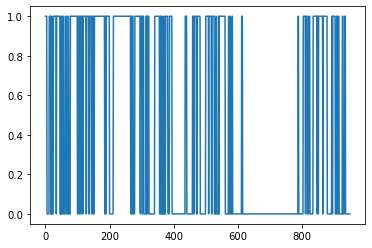

In [121]:
            plt.plot(Regressor)

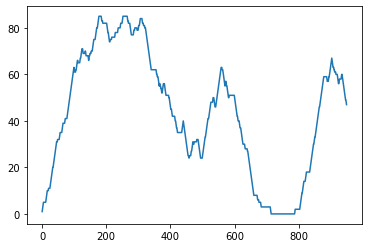

In [122]:
 plt.plot(Regressork)

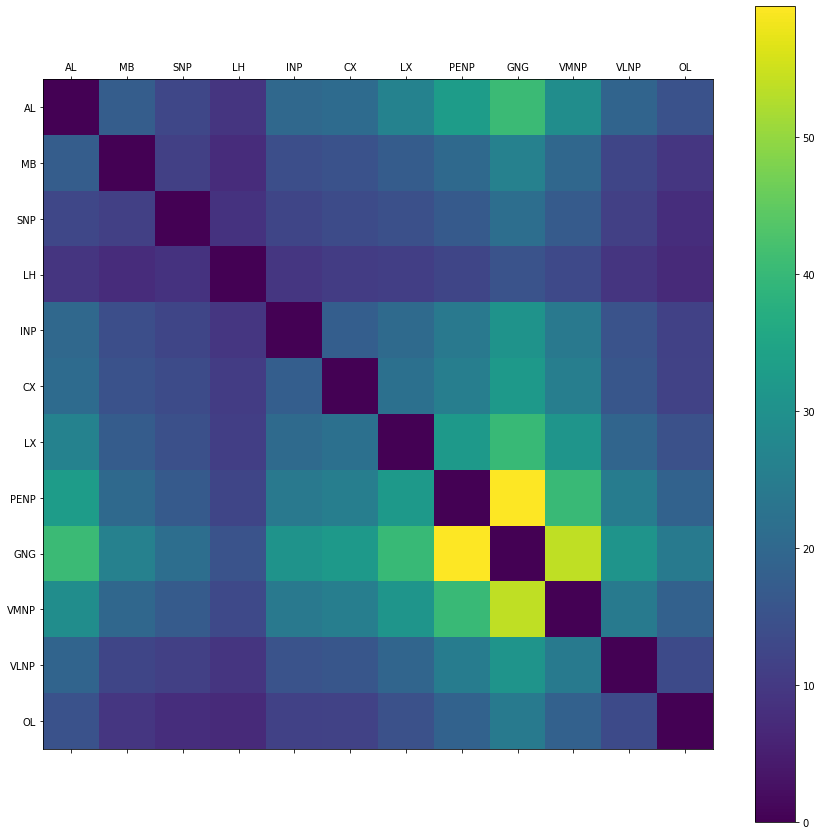

In [123]:
CovMat12Rw[np.eye(12)==1]=0
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(CovMat12Rw)
fig.colorbar(cax)
yaxis = np.arange(len(NameList))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList)

xaxis = np.arange(len(NameList))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList)

plt.show()

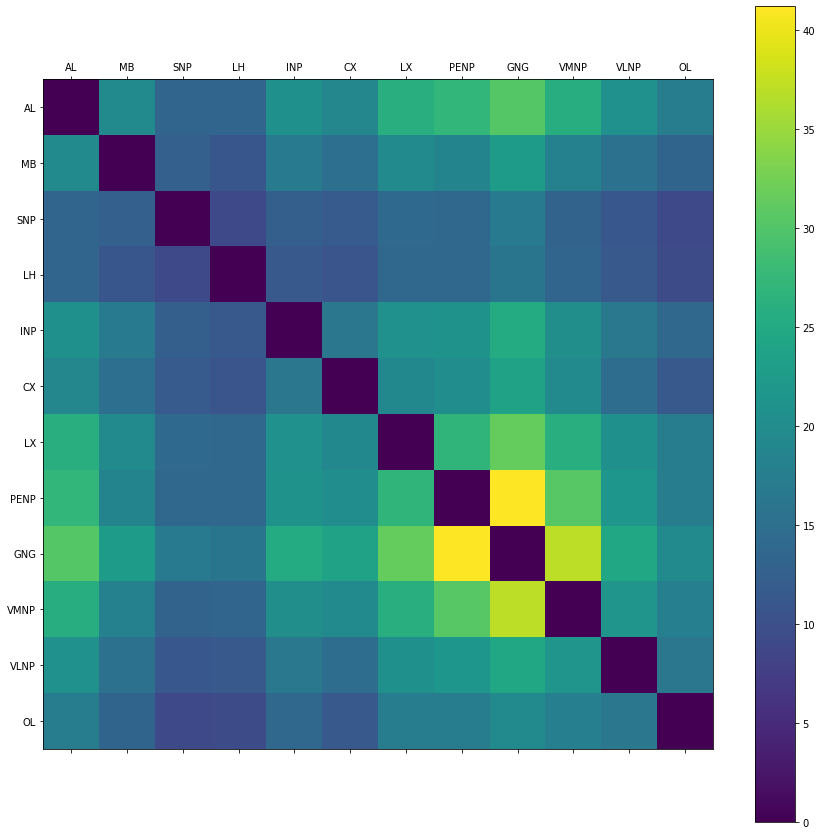

In [124]:
CovMat12Rnw[np.eye(12)==1]=0
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(CovMat12Rnw)
fig.colorbar(cax)
yaxis = np.arange(len(NameList))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList)

xaxis = np.arange(len(NameList))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList)

plt.show()

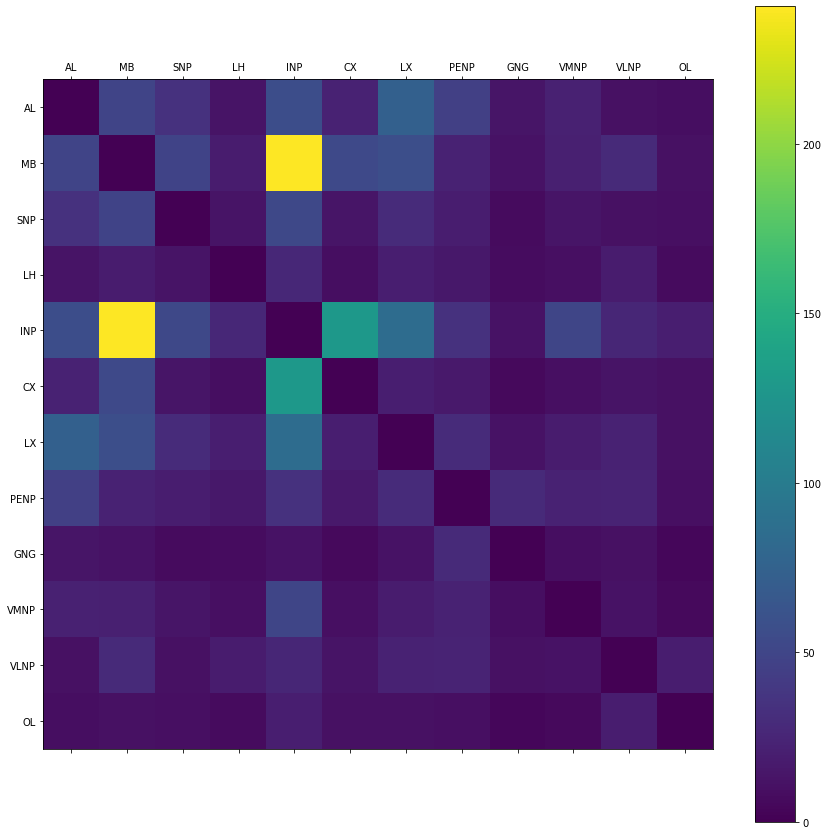

In [125]:
InvCovMat12Rw[np.eye(12)==1]=0
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(InvCovMat12Rw)
fig.colorbar(cax)
yaxis = np.arange(len(NameList))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList)

xaxis = np.arange(len(NameList))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList)

plt.show()

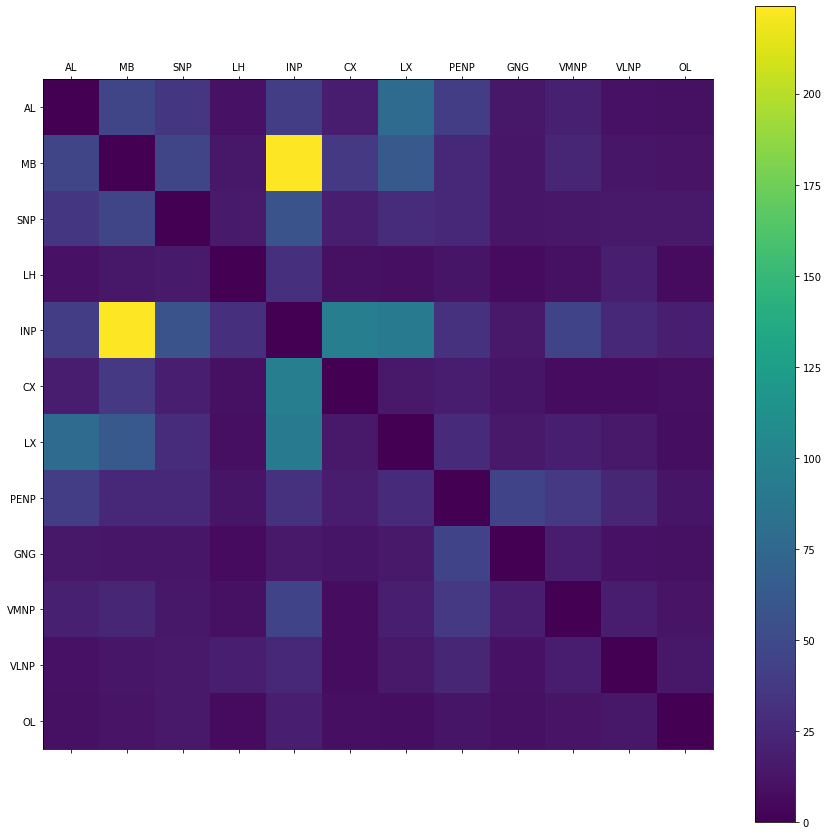

In [126]:
InvCovMat12Rnw[np.eye(12)==1]=0
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(InvCovMat12Rnw)
fig.colorbar(cax)
yaxis = np.arange(len(NameList))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList)

xaxis = np.arange(len(NameList))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList)

plt.show()

In [116]:
import h5py
hf = h5py.File('12RegionsConnectomeWalk.h5', 'w')
hf.create_dataset('NameList', data=NameList)
hf.create_dataset('InvCovMat12Rnw', data=InvCovMat12Rnw)
hf.create_dataset('CovMat12Rnw', data=CovMat12Rnw)
hf.create_dataset('InvCovMat12Rw', data=InvCovMat12Rw)
hf.create_dataset('CovMat12Rw', data=CovMat12Rw)
hf.close()

# Anatomical connectome

In [215]:
import nibabel as nb

In [216]:
nim=nb.load("D:\\MasksBigRegionsby2.nii")
Masks=np.squeeze(nim.get_fdata()).reshape(121*56*17,12)

In [217]:
directory="D:\\VFB2\\"
VFB2=np.zeros(121*56*17)
Projections=np.zeros((21805,12))

i=0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    nim=nb.load(f)
    VFB2=np.squeeze(nim.get_fdata()).reshape(121*56*17)
    
    Projections[i,:]=np.dot(VFB2, Masks)
    #Dtemp.shape
    i+=1
    if i%1000==0:
        print(i)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000


In [218]:
NameList=['AL','MB','SNP','LH','INP','CX','LX','PENP','GNG','VMNP','VLNP','OL']

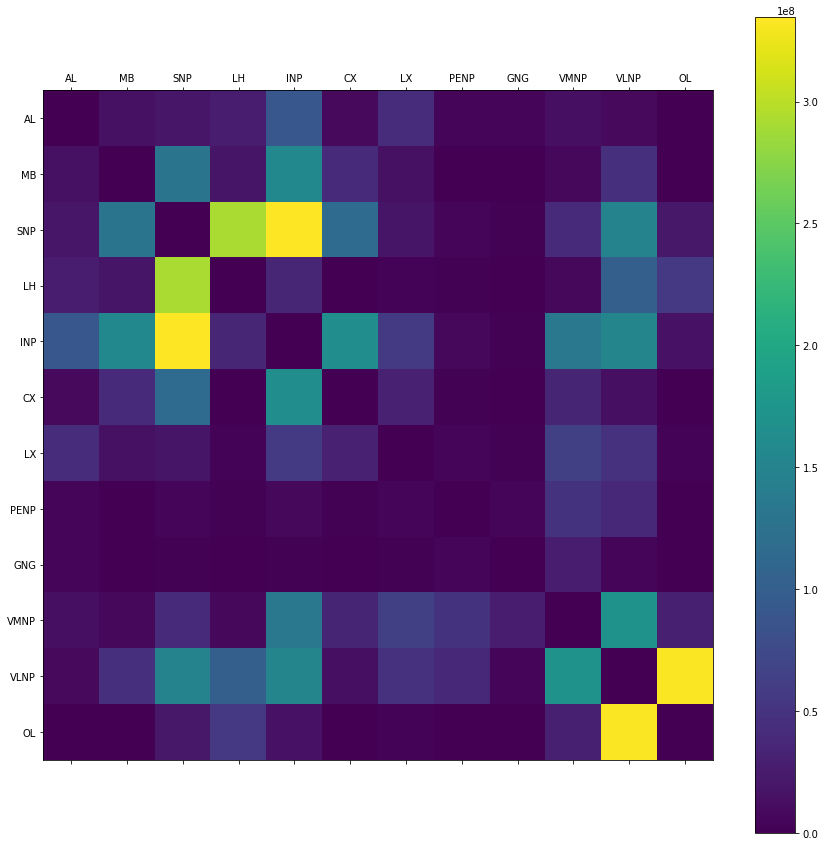

In [219]:
AnatMat=np.dot(Projections.T,Projections)
AnatMat[np.eye(12)==1]=0
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(AnatMat)
fig.colorbar(cax)
yaxis = np.arange(len(NameList))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList)

xaxis = np.arange(len(NameList))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList)

plt.show()

In [220]:
hf = h5py.File('12RegionsConnectome.h5', 'a')
hf.create_dataset('AnatMat', data=AnatMat)
hf.close()

In [141]:
Ua=sio.loadmat("Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure5\ScoresEM.mat")
Ua=sio.loadmat("Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure5\ScoresEM.mat")
ScoresEM=Ua['ScoresEM']

# Functional subregions

In [3]:
NameList=['ALdm','ALd','ALvm','ALal','Gamma1','Gamma2','Gamma3','Gamma4','Gamma5','Beta1','beta2','Alpha2','Alpha3','CAl','CAm','PI','SMPm','SMPplproj','SMPlvp','SMPlda','SIPd','SLPpv','SLPpd','SLPa','LHdm','LHvm','LHvl','LHl','LHdl','Sup.Cl.','InferiorClamp','IB-Antl','FBd','FBl','FBv','EBp','EBa','PBp','PBm','PBl','PBml','LAL','PRW','Saddle','AMMCa','AMMCp','GNGm','GNGav','GNGv','GNGdam','GNGdl','GNGlda','GNGvl','GNGm','Vest','SPSm','SPSl','SPSdl','IPS','AVLPm','AVLPav','AVLPabulk','AVLPaav','AVLPl','AVLPd','AVLPpv','AVLPpbulk','AVLPdm','Wedgea','Wedgep','PLPd','PLPdp','PLPpl','LO','OL','ALdm','ALd','ALvm','ALal','Gamma1','Gamma2','Gamma3','Gamma4','Gamma5','Beta1','beta2','Alpha2','Alpha3','CAl','CAm','PI','SMPm','SMPplproj','SMPlvp','SMPlda','SIPd','SLPpv','SLPpd','SLPa','LHdm','LHvm','LHvl','LHl','LHdl','Sup.Cl.','InferiorClamp','IB-Antl','FBd','FBl','FBv','EBp','EBa','PBp','PBm','PBl','PBml','LAL','PRW','Saddle','AMMCa','AMMCp','GNGm','GNGav','GNGv','GNGdam','GNGdl','GNGlda','GNGvl','GNGm','Vest','SPSm','SPSl','SPSdl','IPS','AVLPm','AVLPav','AVLPabulk','AVLPaav','AVLPl','AVLPd','AVLPpv','AVLPpbulk','AVLPdm','Wedgea','Wedgep','PLPd','PLPdp','PLPpl','LO','OL'];

In [4]:
GoodICFiles=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\GoodICsdf.pkl")

## Granger causality

In [5]:
from statsmodels.tsa.stattools import grangercausalitytests

In [6]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    
    https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    print(maxlag)
    for c in df.columns:
       # if data[[r]][0] not nan
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            #The data for testing whether the time series in the second column Granger causes the time series in the first column.
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            F_values = [test_result[1][0]['ssr_ftest'][0] for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            max_F_value = np.max(F_values)            
            df.loc[r, c] = max_F_value
            #print(max_F_value)
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [7]:
i=0
# little simulation
TS=loadmat("C:\\Users\\Soso\\Desktop\\FuncRegionTS\\"+list(GoodICFiles.loc[GoodICFiles.index == i]['expID'])[0]+"_150FuncRegionsTS.mat")['TS']


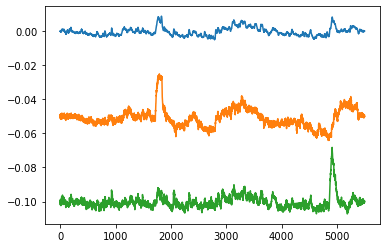

In [8]:
TSm=np.mean(TS,0)
plt.plot(TSm)
plt.plot(TS[51,:]-0.05)
plt.plot(TS[5,:]-0.1)

In [9]:
NameList[50]

'GNGdl'

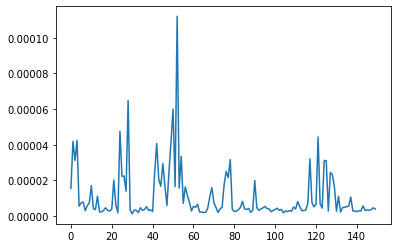

In [10]:
V=np.var(TS-TSm,1)
plt.plot(V)

In [23]:
TSmnoise=TSm+np.random.normal(0,0.0004,len(TSm))

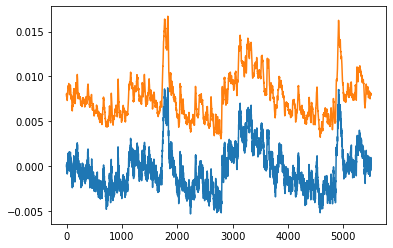

In [25]:
plt.plot(TSmnoise)
plt.plot(TSm+0.008)

In [27]:
TStest=pd.DataFrame(np.array([TSmnoise,TSm]).T)
test_result =grangercausalitytests(TStest, maxlag=1, verbose=False)
test_result[1][0]['ssr_chi2test'][1]
#test_result[1][0]['ssr_chi2test'][0]

0.0

In [28]:
TStest=pd.DataFrame(np.array([TSm,TSmnoise]).T)
test_result =grangercausalitytests(TStest, maxlag=1, verbose=False)
test_result[1][0]['ssr_chi2test'][1]
#test_result[1][0]['ssr_chi2test'][0]

0.44472746471976843

In [17]:
transfer_entropy(TSmnoise[1:4000],TSm[0:3999],k=1)

0.0

In [21]:
transfer_entropy(TSm[0:3999], TSm[1:4000], k=2)

0.0

In [ ]:
#del Cov
#del InvCov

CovMat=np.zeros((len(NameList),len(NameList)))
InvCovMat=np.zeros((len(NameList),len(NameList)))
Cov=np.zeros((len(NameList),len(NameList)))
InvCov=np.zeros((len(NameList),len(NameList)))

CovMatDiff=np.zeros((len(NameList),len(NameList)))
InvCovMatDiff=np.zeros((len(NameList),len(NameList)))
CovDiff=np.zeros((len(NameList),len(NameList)))
InvCovDiff=np.zeros((len(NameList),len(NameList)))

G_all=np.zeros((75,75,50))

m=0
for i in range(GoodICFiles.shape[0]): 
#for i in range(10):     
    try:
        if list(GoodICFiles.loc[GoodICFiles.index == i]['GAL4'])[0]=='Nsyb' or list(GoodICFiles.loc[GoodICFiles.index == i]['GAL4'])[0]=='GMR57C10':
            TS=loadmat("C:\\Users\\Soso\\Desktop\\FuncRegionTS\\"+list(GoodICFiles.loc[GoodICFiles.index == i]['expID'])[0]+"_150FuncRegionsTS.mat")['TS']
    
            
            if TS.shape[1]>TS.shape[0]:
                TS=TS.T
            #for k in range(150):
               # TS[:,k]=(TS[:,k]-np.mean(TS[:,k]))/np.mean(TS[:,k])

            Cov=np.dot(TS.T,TS)
            Cov[np.eye(150)==1]=0
            for k in range(1,150):
                if np.isnan(Cov[k,0]):
                    print(NameList[k])
            TSdf=pd.DataFrame(TS[:,range(75)])
            TSdf.columns = TSdf.columns.astype(str)
            FR=GoodICFiles.iloc[i]['FR']
            maxlag=int(FR/5)
            G1=grangers_causation_matrix(TSdf,TSdf.columns, test='ssr_chi2test', verbose=False)
            
            TSdf=pd.DataFrame(TS[:,range(75,150)])
            TSdf.columns = TSdf.columns.astype(str)
            
            G2=grangers_causation_matrix(TSdf,TSdf.columns, test='ssr_chi2test', verbose=False)  
            G=G1+G2
            G[np.eye(75)==1]=0
            G_all[:,:,m]=G
            m=m+1
            
            #gc_res = grangercausalitytests(data, 4)
            
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111)
            cax = ax.matshow(G)            
            yaxis = np.arange(len(NameList[0:75]))            
            ax.set_yticks(yaxis)
            ax.set_yticklabels(NameList[0:75])
            xaxis = np.arange(len(NameList[0:75]))
            ax.set_xticks(xaxis)
            ax.set_xticklabels(NameList[0:75])
            plt.xticks(rotation=45)
            plt.show()
            
            print(GoodICFiles.loc[GoodICFiles.index == i]["expID"])

            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111)
            cax = ax.matshow(np.abs(Cov[0:75,0:75])+np.abs(Cov[75:150,75:150]))            
            yaxis = np.arange(len(NameList[0:75]))            
            ax.set_yticks(yaxis)
            ax.set_yticklabels(NameList[0:75])
            
            xaxis = np.arange(len(NameList[0:75]))
            ax.set_xticks(xaxis)
            ax.set_xticklabels(NameList[0:75])
            plt.show()
            
            CovMat=CovMat+Cov     
            
            InvCov=np.linalg.pinv(Cov)
            InvCovMat+=InvCov


            
#             TSdiff=np.diff(TS.T).T
#             CovDiff=np.dot(TSdiff.T,TSdiff)
#             CovDiff[np.eye(150)==1]=0  
#             InvCovDiff=np.linalg.pinv(np.dot(TSdiff.T,TSdiff))        
#             CovMatDiff+=CovDiff
#             InvCovMatDiff+=InvCovDiff
            

          #  del TS
    except:
        continue   
                    # Regress here, cross corr...

10
20
20


In [ ]:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111)
            cax = ax.matshow(G_all)            
            yaxis = np.arange(len(NameList[0:75]))            
            ax.set_yticks(yaxis)
            ax.set_yticklabels(NameList[0:75])
            xaxis = np.arange(len(NameList[0:75]))
            ax.set_xticks(xaxis)
            ax.set_xticklabels(NameList[0:75])
            plt.xticks(rotation=45)
            plt.show()

In [75]:
TSdf.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [ ]:
data=TSdf[['7', '0']]
gc_res = grangercausalitytests(data, 2)
gc_res[0]

In [84]:
gc_res[1][0]['ssr_ftest'][1]*75*75

2.123889292353347e-05

NameError: name 'G_all' is not defined

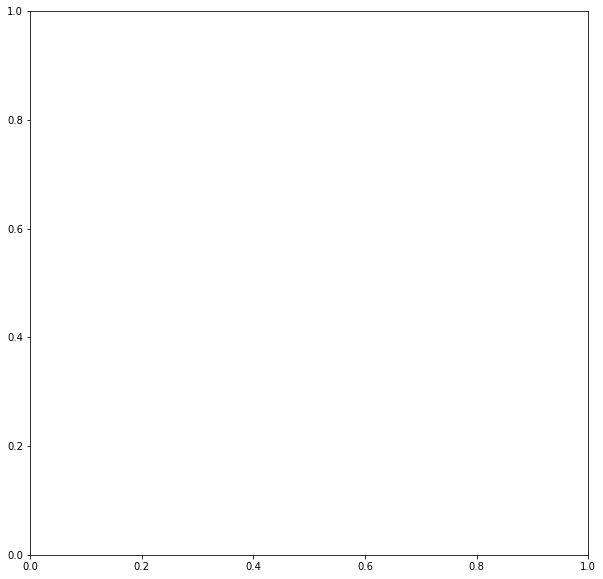

In [90]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(np.nanmean(G_all,2))           
yaxis = np.arange(len(NameList[0:75]))            
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList[0:75])
xaxis = np.arange(len(NameList[0:75]))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList[0:75])
plt.xticks(rotation=45)
plt.show()

In [1]:
#del Cov
#del InvCov
CovMat=np.zeros((len(NameList),len(NameList)))
InvCovMat=np.zeros((len(NameList),len(NameList)))
Cov=np.zeros((len(NameList),len(NameList)))
InvCov=np.zeros((len(NameList),len(NameList)))

CovMatDiff=np.zeros((len(NameList),len(NameList)))
InvCovMatDiff=np.zeros((len(NameList),len(NameList)))
CovDiff=np.zeros((len(NameList),len(NameList)))
InvCovDiff=np.zeros((len(NameList),len(NameList)))


for i in range(GoodICFiles.shape[0]): 
#for i in range(10):     
    try:
        if list(GoodICFiles.loc[GoodICFiles.index == i]['GAL4'])[0]=='Nsyb' or list(GoodICFiles.loc[GoodICFiles.index == i]['GAL4'])[0]=='GMR57C10':
            TS=loadmat("C:\\Users\\Soso\\Desktop\\FuncRegionTS\\"+list(GoodICFiles.loc[GoodICFiles.index == i]['expID'])[0]+"_150FuncRegionsTS.mat")['TS']
    
            
            if TS.shape[1]>TS.shape[0]:
                TS=TS.T
            for k in range(150):
                TS[:,k]=(TS[:,k]-np.mean(TS[:,k]))/np.var(TS[:,k])

            Cov=np.dot(TS.T,TS)
            Cov[np.eye(150)==1]=0
            for k in range(1,150):
                if np.isnan(Cov[k,0]):
                    print(NameList[k])
                    
            print(GoodICFiles.loc[GoodICFiles.index == i]["expID"])

            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111)
            cax = ax.matshow(np.abs(Cov))            
            yaxis = np.arange(len(NameList[0:75]))            
            ax.set_yticks(yaxis)
            ax.set_yticklabels(NameList[0:75])
            xaxis = np.arange(len(NameList[0:75]))
            ax.set_xticks(xaxis)
            ax.set_xticklabels(NameList[0:75])
            plt.show()
            
            CovMat=CovMat+Cov     
            
            InvCov=np.linalg.pinv(Cov)
            InvCovMat+=InvCov


            
#             TSdiff=np.diff(TS.T).T
#             CovDiff=np.dot(TSdiff.T,TSdiff)
#             CovDiff[np.eye(150)==1]=0  
#             InvCovDiff=np.linalg.pinv(np.dot(TSdiff.T,TSdiff))        
#             CovMatDiff+=CovDiff
#             InvCovMatDiff+=InvCovDiff
            

          #  del TS
    except:
        continue   
                    # Regress here, cross corr...

NameError: name 'np' is not defined

In [16]:
np.isnan(Cov[28,0])

True

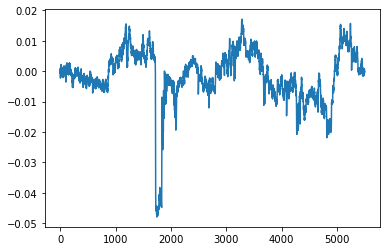

In [39]:
plt.plot(TS[:,50])

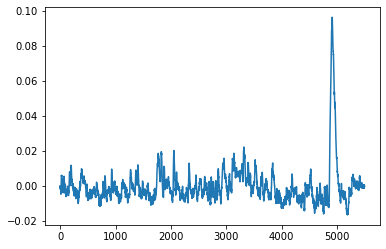

In [40]:
plt.plot(TS[:,10])

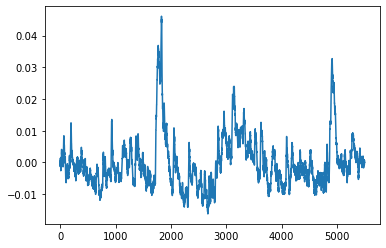

In [41]:
plt.plot(TS[:,2])

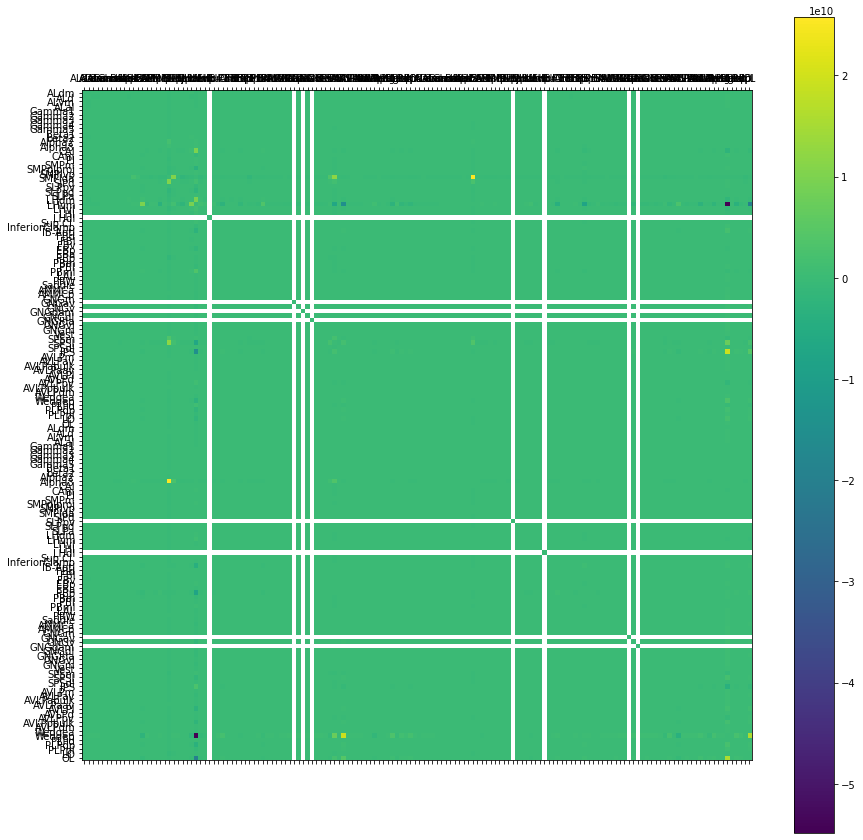

In [18]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow((CovMat+CovMat.T))
fig.colorbar(cax)
yaxis = np.arange(len(NameList))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList)

xaxis = np.arange(len(NameList))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList)

plt.show()

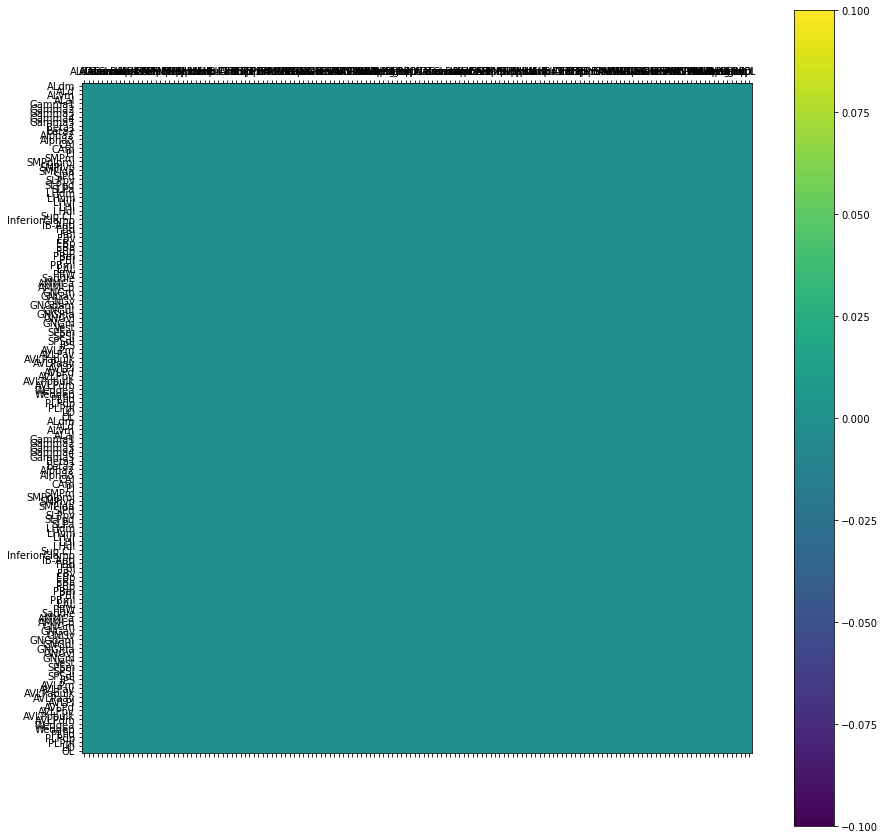

In [12]:
InvCovMat[np.eye(150)==1]=0  
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow((InvCovMat+InvCovMat.T))
fig.colorbar(cax)
yaxis = np.arange(len(NameList))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList)

xaxis = np.arange(len(NameList))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList)

plt.show()

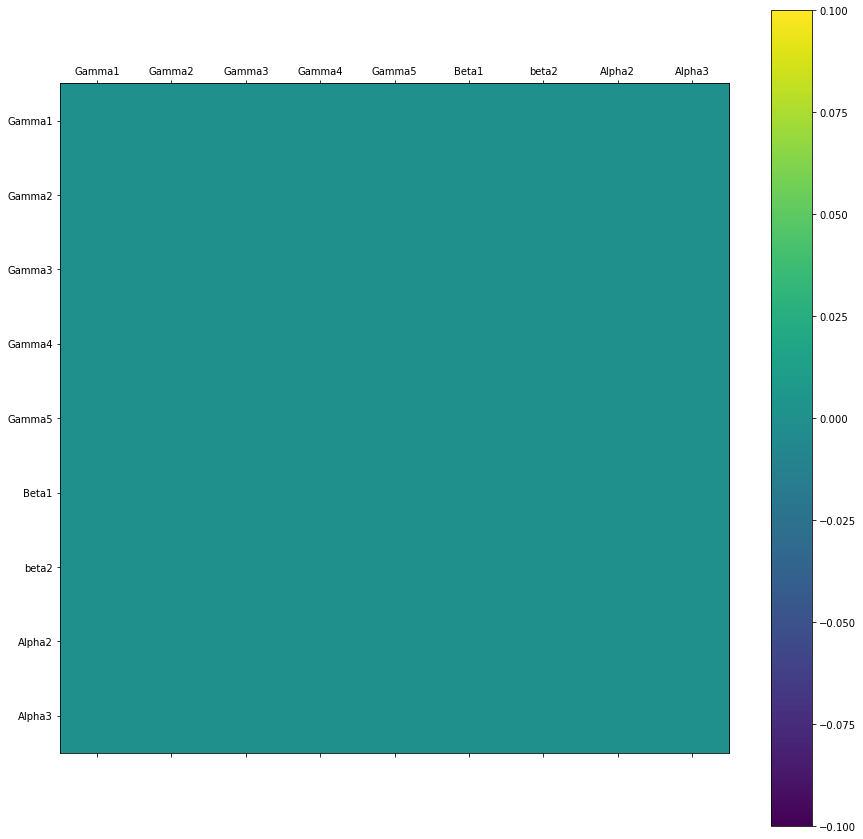

In [13]:
InvCovMat[np.eye(150)==1]=0  
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow((InvCovMat[4:13,4:13]+InvCovMat[4:13,4:13].T))
fig.colorbar(cax)
yaxis = np.arange(len(NameList[4:13]))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList[4:13])

xaxis = np.arange(len(NameList[4:13]))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList[4:13])

plt.show()

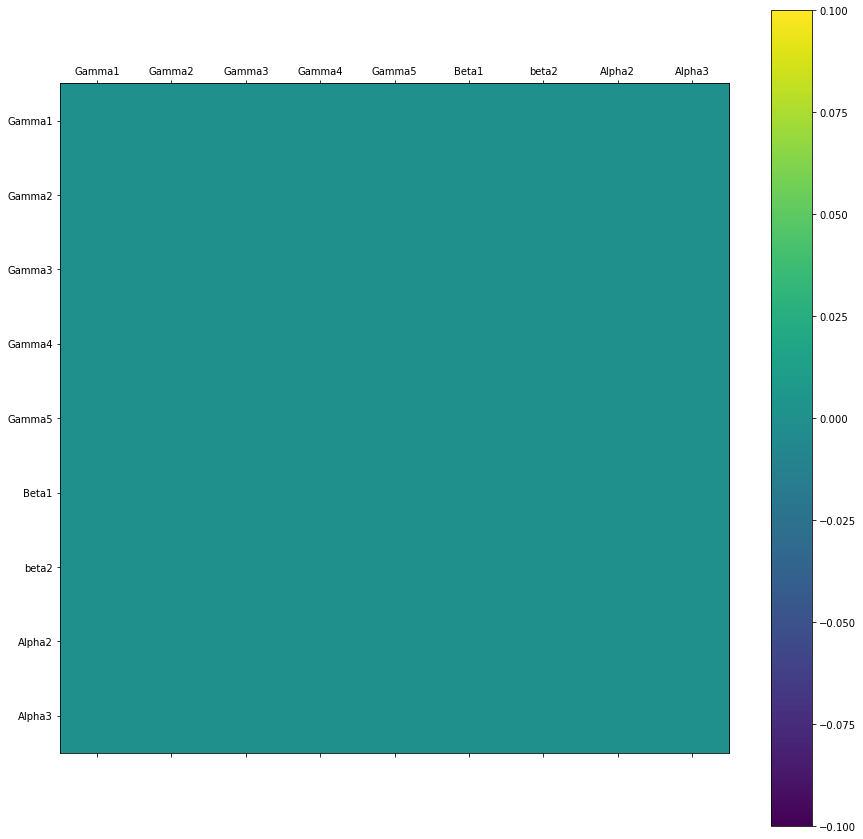

In [14]:
InvCovMat[np.eye(150)==1]=0  
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(np.abs(InvCovMat[4:13,4:13]+InvCovMat[4:13,4:13].T+InvCovMat[75+4:75+13,75+4:75+13]+InvCovMat[75+4:75+13,75+4:75+13].T))
fig.colorbar(cax)
yaxis = np.arange(len(NameList[4:13]))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList[75+4:75+13])

xaxis = np.arange(len(NameList[4:13]))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList[75+4:75+13])

plt.show()

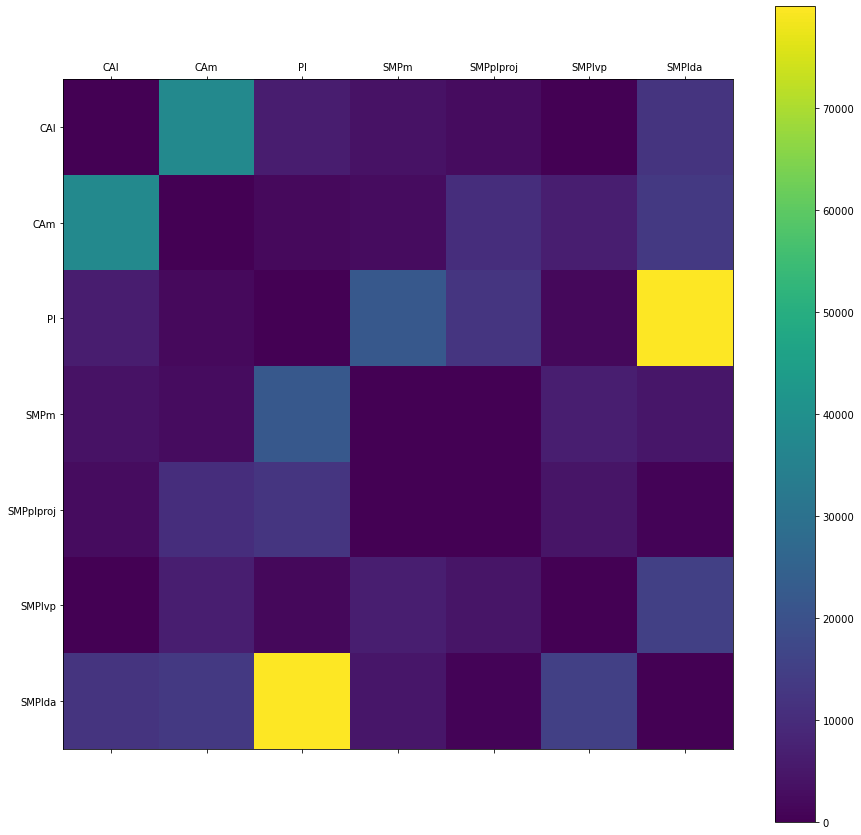

In [301]:
InvCovMat[np.eye(150)==1]=0  
rang=np.array(range(13,20))
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(np.abs(InvCovMat[rang][:,rang]+InvCovMat[rang][:,rang].T))
fig.colorbar(cax)
yaxis = np.arange(rang.shape[0])
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList[13:20])

xaxis = np.arange(len(NameList[13:20]))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList[13:20])

plt.show()

In [ ]:
InvCovMat[np.eye(150)==1]=0  
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(np.abs(CovMat[4:13,4:13]+CovMat[4:13,4:13].T+CovMat[75+4:75+13,75+4:75+13]+CovMat[75+4:75+13,75+4:75+13].T))
fig.colorbar(cax)
yaxis = np.arange(len(NameList[4:13]))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList[75+4:75+13])

xaxis = np.arange(len(NameList[4:13]))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList[75+4:75+13])

plt.show()

# Func regions anatomical connectome

In [303]:
hf = h5py.File('FuncRegionsConnectome.h5', 'w')
hf.create_dataset('AnatMat', data=AnatMat)
hf.create_dataset('NameList', data=NameList)
hf.create_dataset('InvCovMat', data=InvCovMat)
hf.create_dataset('CovMat', data=CovMat)
hf.close()

In [21]:
hf = h5py.File('FuncRegionsConnectomeAnat.h5', 'w')
hf.create_dataset('AnatMat', data=AnatMat[1:75,1:75])
hf.create_dataset('NameList', data=NameList[1:75])
hf.close()

In [18]:
import h5py
hf = h5py.File('FuncRegionsConnectome.h5', 'r')
AnatMat=hf['AnatMat'][:]
NameList=hf['NameList']
hf.close()

In [19]:
NameList=['ALdm','ALd','ALvm','ALal','Gamma1','Gamma2','Gamma3','Gamma4','Gamma5','Beta1','beta2','Alpha2','Alpha3','CAl','CAm','PI','SMPm','SMPplproj','SMPlvp','SMPlda','SIPd','SLPpv','SLPpd','SLPa','LHdm','LHvm','LHvl','LHl','LHdl','Sup.Cl.','InferiorClamp','IB-Antl','FBd','FBl','FBv','EBp','EBa','PBp','PBm','PBl','PBml','LAL','PRW','Saddle','AMMCa','AMMCp','GNGm','GNGav','GNGv','GNGdam','GNGdl','GNGlda','GNGvl','GNGm','Vest','SPSm','SPSl','SPSdl','IPS','AVLPm','AVLPav','AVLPabulk','AVLPaav','AVLPl','AVLPd','AVLPpv','AVLPpbulk','AVLPdm','Wedgea','Wedgep','PLPd','PLPdp','PLPpl','LO','OL','ALdm','ALd','ALvm','ALal','Gamma1','Gamma2','Gamma3','Gamma4','Gamma5','Beta1','beta2','Alpha2','Alpha3','CAl','CAm','PI','SMPm','SMPplproj','SMPlvp','SMPlda','SIPd','SLPpv','SLPpd','SLPa','LHdm','LHvm','LHvl','LHl','LHdl','Sup.Cl.','InferiorClamp','IB-Antl','FBd','FBl','FBv','EBp','EBa','PBp','PBm','PBl','PBml','LAL','PRW','Saddle','AMMCa','AMMCp','GNGm','GNGav','GNGv','GNGdam','GNGdl','GNGlda','GNGvl','GNGm','Vest','SPSm','SPSl','SPSdl','IPS','AVLPm','AVLPav','AVLPabulk','AVLPaav','AVLPl','AVLPd','AVLPpv','AVLPpbulk','AVLPdm','Wedgea','Wedgep','PLPd','PLPdp','PLPpl','LO','OL'];


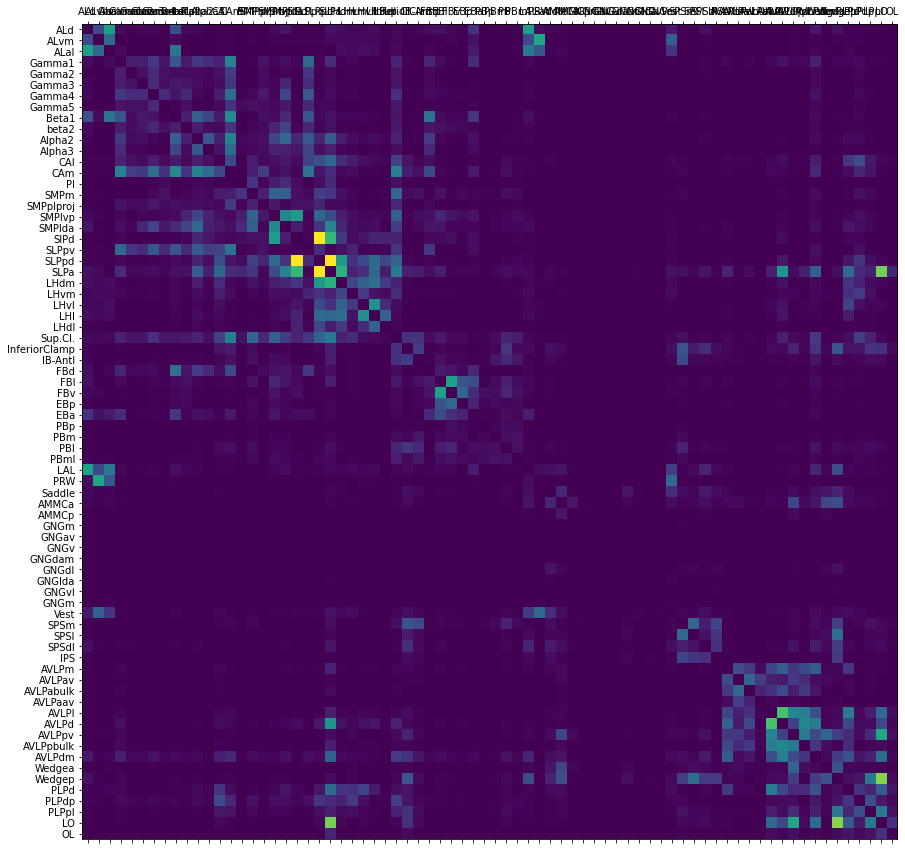

In [20]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(AnatMat[1:75,1:75])
#fig.colorbar(cax)
yaxis = np.arange(len(NameList[1:75]))
ax.set_yticks(yaxis)
ax.set_yticklabels(NameList[1:75])

xaxis = np.arange(len(NameList[1:75]))
ax.set_xticks(xaxis)
ax.set_xticklabels(NameList[1:75])

plt.show()

In [312]:
CovMat[np.isnan(CovMat)]=0


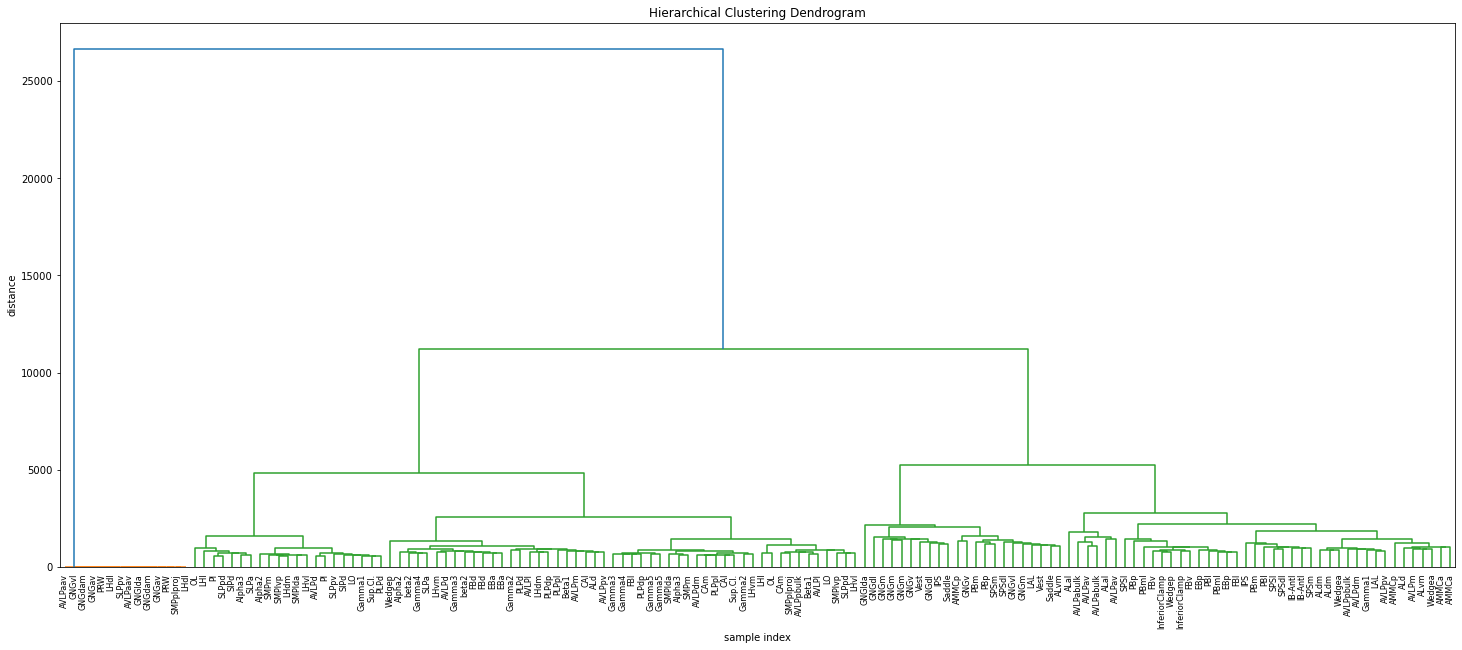

In [313]:
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(CovMat+CovMat.T, 'ward')
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels=NameList
)
plt.show()


#c, coph_dists = cophenet(Z, pdist(X))

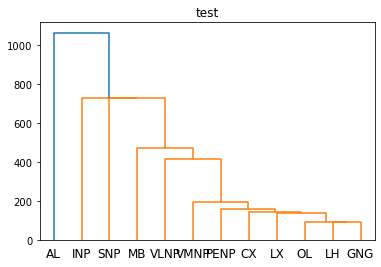

In [254]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform


mat = InvCovMat
dists = squareform(mat)
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=NameList)
plt.title("test")
plt.show()

In [ ]:
next steps: separate walk from rest cluster matrices, other sub networks interesting?, 

In [127]:
import json

In [136]:
f = open('C:\\Users\\Soso\\Desktop\\NeuBrain_roiconnectivity.json')
json_file = json.load(f)



In [137]:
json_file

{'roi_names': ['AB(L)',
  'CA(L)',
  "a'L(L)",
  'aL(L)',
  'FLA(R)',
  'EPA(L)',
  'bL(L)',
  'gL(L)',
  'ATL(R)',
  "b'L(L)",
  'NO',
  'PB',
  'EB',
  'BU(R)',
  "a'L(R)",
  "b'L(R)",
  'PED(R)',
  'bL(R)',
  'aL(R)',
  'gL(R)',
  'CA(R)',
  'AL(R)',
  'AL(L)',
  'LAL(L)',
  'SIP(L)',
  'AOTU(R)',
  'LO(R)',
  'LH(R)',
  'PLP(R)',
  'SCL(R)',
  'SMP(L)',
  'SMP(R)',
  'SLP(R)',
  'SIP(R)',
  'CRE(R)',
  'CRE(L)',
  'PVLP(R)',
  'AVLP(R)',
  'ICL(R)',
  'SPS(R)',
  'IPS(R)',
  'IB',
  'SPS(L)',
  'FB',
  'LAL(R)',
  'WED(R)',
  'VES(R)',
  'SAD',
  'GNG',
  'LOP(R)',
  'ATL(L)',
  'ICL(L)',
  'GOR(R)',
  'SCL(L)',
  'VES(L)',
  'EPA(R)',
  'GOR(L)',
  'CAN(R)',
  'AME(R)',
  'BU(L)',
  'AB(R)',
  'ME(R)',
  'PRW'],
 'weights': {'AB(L)=>AB(L)': {'count': 59, 'weight': 96.30136759231067},
  'AB(L)=>AB(R)': {'count': 23, 'weight': 72.52808601627926},
  'AB(L)=>BU(L)': {'count': 13, 'weight': 3.1076989863983115},
  'AB(L)=>BU(R)': {'count': 2, 'weight': 0.01819166207977994},
  'AB(L)=>CR

# Func regions: walk/no walk

In [39]:
CovMat150Rw=np.zeros((150,150))
InvCovMat150Rw=np.zeros((150,150))
Covw=np.zeros((150,150))
InvCovw=np.zeros((150,150))


CovMat150Rnw=np.zeros((150,150))
InvCovMat150Rnw=np.zeros((150,150))
Covnw=np.zeros((150,150))
InvCovnw=np.zeros((150,150))

for i in range(GoodICFiles.shape[0]): 
#for i in range(10):       
    try:
        if list(GoodICFiles.loc[GoodICFiles.index == i]['GAL4'])[0]=='Nsyb' or list(GoodICFiles.loc[GoodICFiles.index == i]['GAL4'])[0]=='GMR57C10':
            TS=loadmat("C:\\Users\\Soso\\Desktop\\FuncRegionTS\\"+list(GoodICFiles.loc[GoodICFiles.index == i]['expID'])[0]+"_150FuncRegionsTS.mat")['TS']
            print(TS.shape)    
            try:
                Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['R']
            except:
                try:
                    Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rwalk']
                except:
                    try:
                        Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('WalkRbinkd','Rbin'))['R']
                    except:
                        try:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('Rbinkd','Rbin'))['Rbin']
                        except:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rbin']
            print(Regressor.shape)
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,1:Regressor.shape[0]]            
            if TS.shape[1]==(Regressor.shape[0]+3):
                TS=TS[:,2:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]+4):
                TS=TS[:,2:Regressor.shape[0]-2]   
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    

            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]    
            if TS.shape[1]==(Regressor.shape[0]-5):
                Regressor=Regressor[2:Regressor.shape[0]-3]                  
            if TS.shape[1]==(Regressor.shape[0]+6):
                TS=TS[:,3:TS.shape[1]-3]   
            if TS.shape[1]==(Regressor.shape[0]-11):
                Regressor=Regressor[5:Regressor.shape[0]-6]  
#             if TS.shape[1]<Regressor.shape[0]:    
#                 Regressor=Regressor[int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]     
#             if TS.shape[1]>Regressor.shape[0]:    
#                 TS=TS[:,int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]
           
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]+2):
                TS=TS[:,1:Regressor.shape[0]+1]
            if TS.shape[1]==(Regressor.shape[0]+1):
                TS=TS[:,0:Regressor.shape[0]] 

        
            FR=GoodICFiles.iloc[i]['FR']
            Ker=np.ones(int(20*FR))
            Regressork=np.convolve(Ker, Regressor.reshape(len(Regressor)))[range(len(Regressor))]
            #plt.plot(Regressork)  
           # plt.plot(Regressor)
            TSw=TS[:,np.squeeze(Regressor)==1]
            TSnw=TS[:,np.squeeze(Regressork)==0]
            #print(TSw.shape)
            #print(TSnw.shape)
            if TSnw.shape[1]>0:
            
                Covw=np.dot(TSw,TSw.T)
                Covw[np.eye(150)==1]=0
                Covw=np.abs(Covw+Covw.T)
                Covw=Covw/np.nanmedian(np.nanmedian(Covw))
                CovMat150Rw=CovMat150Rw+Covw
                
                print(sum([int(a) for a in ~np.isnan(Covw[:,0])]))
                n=sum([int(a) for a in ~np.isnan(Covw[:,0])])
                Covwb=np.zeros((n,n))
                
                l=0
                for j in range(150):
                    m=0
                    for k in range(150):
                        if ~np.isnan(Covw[j,k]):
                            Covwb[l,m]=Covw[j,k]
                            m=m+1
                    if ~np.isnan(Covw[j,0]):   
                        l=l+1
                

                
                InvCovwa=np.linalg.pinv(Covwb)
                InvCovwa=np.abs(InvCovwa+InvCovwa.T)
                InvCovw=np.empty((150,150,))
                InvCovw[:] = np.nan
                
                l=0
                for j in range(150):
                    m=0
                    for k in range(150):
                        if ~np.isnan(Covw[j,k]):
                            InvCovw[j,k]=InvCovwa[l,m]
                            m=m+1
                    if ~np.isnan(Covw[j,0]):   
                        l=l+1
                            

                
                #InvCovw[]=InvCovwa
                
                InvCovw=InvCovw/np.nanmax(np.nanmax(InvCovw)) 
                InvCovw[np.eye(150)==1]=0
                InvCovMat150Rw+=InvCovw
                
                fig = plt.figure(figsize=(15,15))
                ax = fig.add_subplot(111)
                cax = ax.matshow(Covw[0:75,0:75]+Covw[75:150,75:150])        
                yaxis = np.arange(len(NameList[0:75]))            
                ax.set_yticks(yaxis)
                ax.set_yticklabels(NameList[0:75])
                xaxis = np.arange(len(NameList[0:75]))
                ax.set_xticks(xaxis)
                ax.set_xticklabels(NameList[0:75])
                plt.show()
                
                Covnw=np.dot(TSnw,TSnw.T)
                Covnw[np.eye(150)==1]=0
                Covnw=np.abs(Covnw+Covnw.T)
                Covnw=Covnw/np.nanmedian(np.nanmedian(Covnw))
                CovMat150Rnw=CovMat150Rnw+Covnw
                 
                
                print(sum([int(a) for a in ~np.isnan(Covnw[:,0])]))
                n=sum([int(a) for a in ~np.isnan(Covnw[:,0])])
                Covnwb=np.zeros((n,n))
                
                l=0
                for j in range(150):
                    m=0
                    for k in range(150):
                        if ~np.isnan(Covnw[j,k]):
                            Covnwb[l,m]=Covw[j,k]
                            m=m+1
                    if ~np.isnan(Covw[j,0]):   
                        l=l+1
                

                
                InvCovnwa=np.linalg.pinv(Covnwb)
                InvCovnwa=np.abs(InvCovnwa+InvCovnwa.T)
                InvCovnw=np.empty((150,150,))
                InvCovnw[:] = np.nan
                
                l=0
                for j in range(150):
                    m=0
                    for k in range(150):
                        if ~np.isnan(Covnw[j,k]):
                            InvCovnw[j,k]=InvCovnwa[l,m]
                            m=m+1
                    if ~np.isnan(Covnw[j,0]):   
                        l=l+1                
                
                InvCovMat150Rnw+=InvCovnw

                print(GoodICFiles.loc[GoodICFiles.index == i]['expID'])
            del TS
    except:
        continue   
                    # Regress here, cross corr...

(150, 5527)
(150, 5115)
(150, 5776)
(150, 5850)
(150, 5889)
(150, 10608)
(150, 4865)
(150, 4996)
(150, 4998)
(150, 4998)
(150, 4996)
(150, 4996)
(150, 4998)
(150, 4996)
(150, 4998)
(150, 7998)
(150, 5996)
(150, 4996)
(150, 4996)
(150, 4995)
(150, 4996)
(150, 4996)
(150, 4996)
(150, 4996)
(150, 4996)
(150, 4996)
(150, 256)
(150, 11603)
(150, 12258)
(150, 21496)
(150, 1445)
(150, 1389)
(150, 2304)
(150, 3546)
(150, 3250)
(150, 2978)
(150, 5998)
(150, 5998)
(150, 4281)
(150, 5998)
(150, 1142)
(150, 1076)
(150, 4022)
(150, 4467)
(150, 5998)
(150, 4765)
(150, 4682)
(150, 4104)
(150, 4787)
(150, 1688)
(150, 3871)
(150, 2404)
(150, 763)
(150, 5998)
(150, 4998)
(150, 4998)
(150, 4998)
(150, 4998)
(150, 4998)
(150, 3319)
(150, 4998)
(150, 1580)
(150, 740)
(150, 261)
(150, 326)
(150, 3162)
(150, 3379)
(150, 2484)


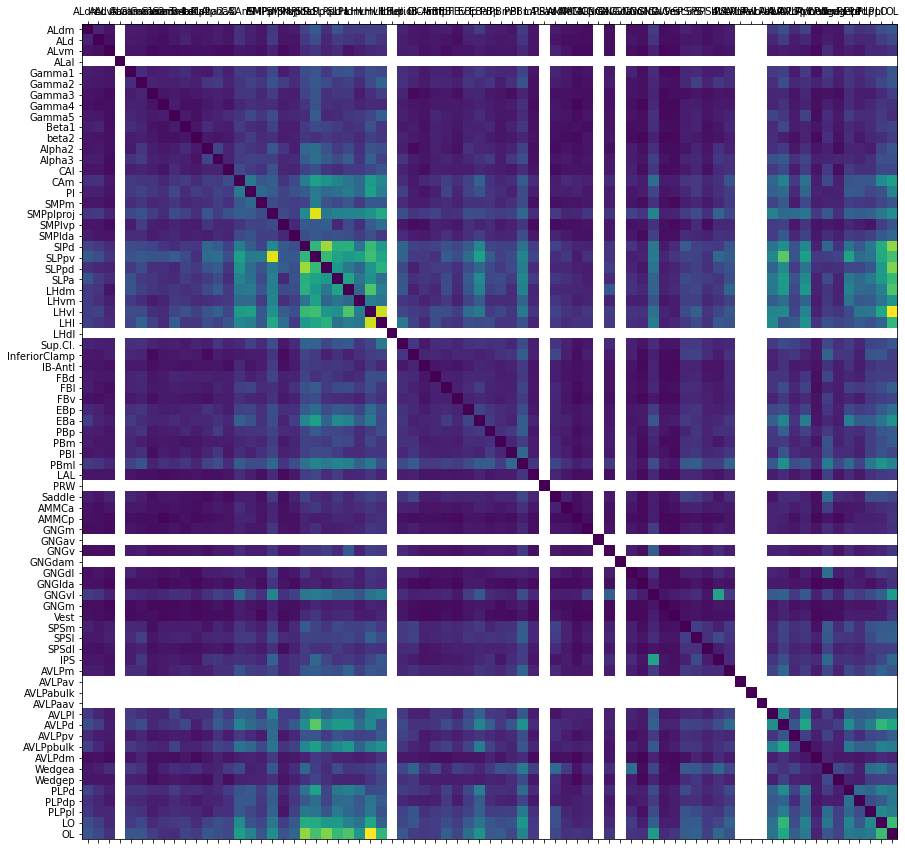

In [37]:
                fig = plt.figure(figsize=(15,15))
                ax = fig.add_subplot(111)
                cax = ax.matshow(InvCovMat150Rw[0:75,0:75]+InvCovMat150Rw[75:150,75:150])        
                yaxis = np.arange(len(NameList[0:75]))            
                ax.set_yticks(yaxis)
                ax.set_yticklabels(NameList[0:75])
                xaxis = np.arange(len(NameList[0:75]))
                ax.set_xticks(xaxis)
                ax.set_xticklabels(NameList[0:75])
                plt.show()

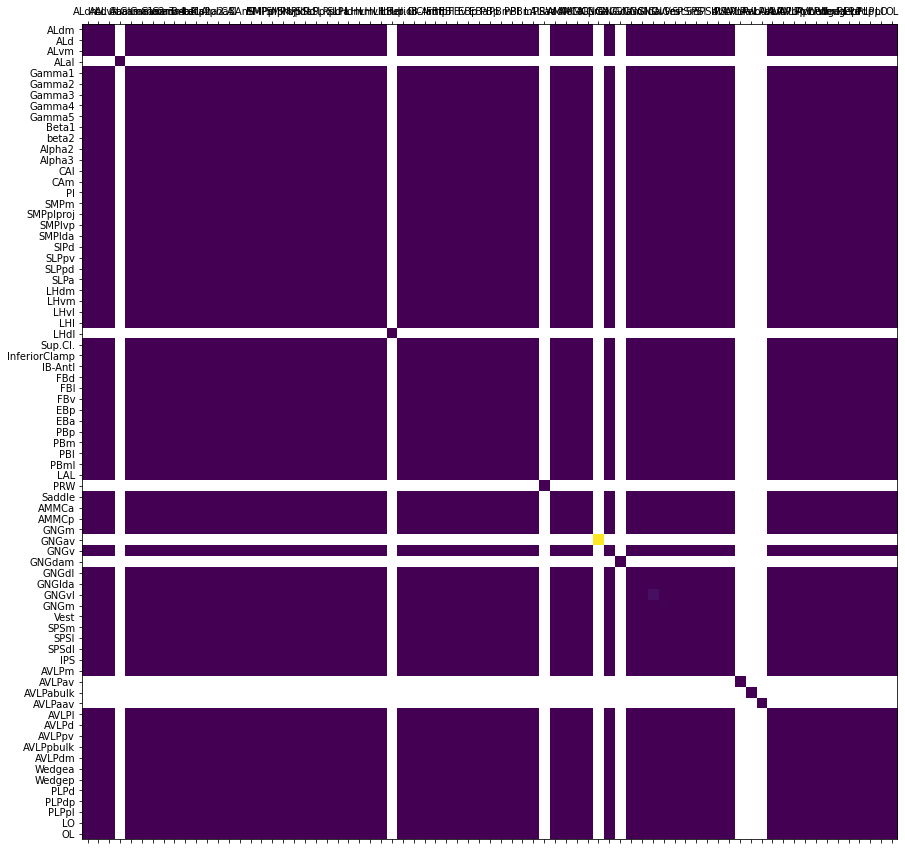

In [38]:
                fig = plt.figure(figsize=(15,15))
                ax = fig.add_subplot(111)
                cax = ax.matshow(InvCovMat150Rnw[0:75,0:75]+InvCovMat150Rnw[75:150,75:150])        
                yaxis = np.arange(len(NameList[0:75]))            
                ax.set_yticks(yaxis)
                ax.set_yticklabels(NameList[0:75])
                xaxis = np.arange(len(NameList[0:75]))
                ax.set_xticks(xaxis)
                ax.set_xticklabels(NameList[0:75])
                plt.show()

In [23]:
del Covwb

In [21]:
np.sqrt(21906)

148.00675660252813

In [ ]:
np.isnan(Covw).shape

In [ ]:
Compdf.pkl